# Make Database & Compare
This script makes a local database of outputfolders from the MOM6 anu-tub simulation.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
db = '/g/data/x77/amh157/mom6-diagnostics/global-01/global.db'

In [3]:
session=cc.database.create_session(db)

In [4]:
dir_list = ['/g/data/ik11/outputs/mom6-panan/panant-01-zstar-v13',
           '/g/data/ik11/outputs/mom6-global-01/global-01-v1']

In [5]:
cc.database.build_index(dir_list,session)

Indexing experiment: panant-01-zstar-v13


0it [00:00, ?it/s]

Indexing experiment: global-01-v1



100%|██████████| 45/45 [00:18<00:00,  2.40it/s]


45

In [14]:
dbx = cc.explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

In [6]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46167,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:34803,Total threads: 4
Dashboard: /proxy/38187/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:38785,


In [7]:
expts = ['panant-01-zstar-v13',
         'global-01-v1']

## ACC Transport

panant-01-zstar-v13
global-01-v1


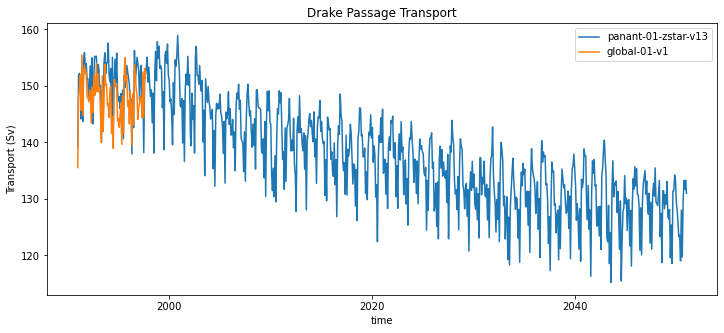

In [8]:
plt.figure(figsize=(12,5))
for expt in expts:
    print(expt)
    umo_2d = cc.querying.getvar(expt,'umo_2d', session,frequency='1 monthly')
    DP = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh')/1e9
    DP.plot(label=expt)
    
plt.title('Drake Passage Transport')
plt.ylabel('Transport (Sv)')
plt.legend()

## Overturning metrics

Text(0.5, 1.0, 'Abyssal cell transport - 55°S')

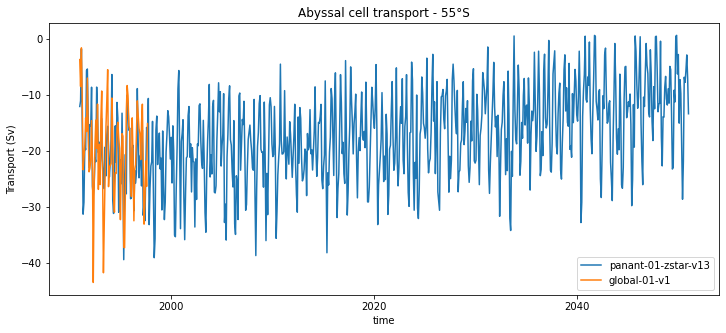

In [9]:
plt.figure(figsize=(12,5))
lat = -55
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

Text(0.5, 1.0, 'Upper cell transport - 45°S')

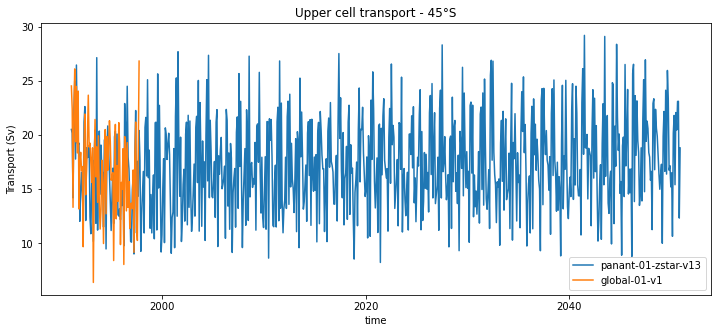

In [10]:
plt.figure(figsize=(12,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

## Overturning streamfunction in 2-year increments.

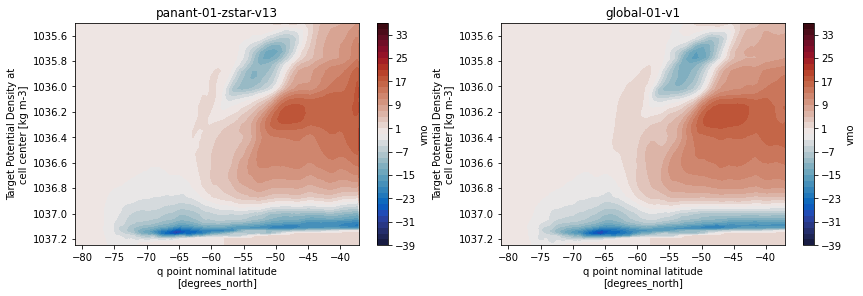

In [11]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_year1 = vmo.sel(time=slice('1991-01-01','1992-12-31')).sel(yq=slice(-85,-37)).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-39,39,2),cmap=cm.cm.balance)
    plt.ylim([1035.5,1037.25])
    plt.gca().invert_yaxis()
    plt.title(expt)


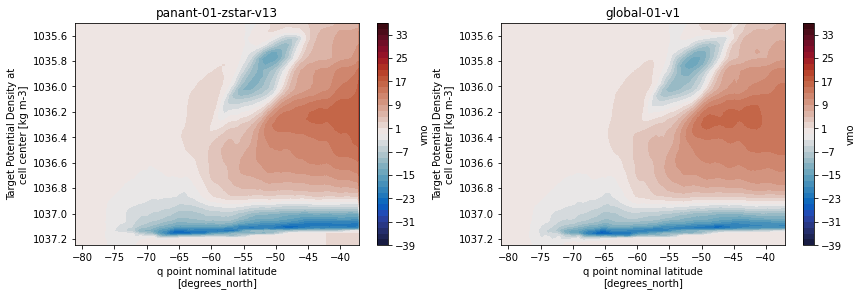

In [12]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_year1 = vmo.sel(time=slice('1993-01-01','1994-12-31')).sel(yq=slice(-85,-37)).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-39,39,2),cmap=cm.cm.balance)
    plt.ylim([1035.5,1037.25])
    plt.gca().invert_yaxis()
    plt.title(expt)


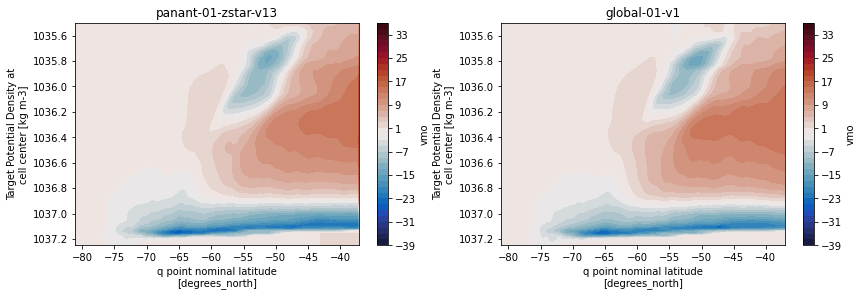

In [13]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_year1 = vmo.sel(time=slice('1995-01-01','1996-12-31')).sel(yq=slice(-85,-37)).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-39,39,2),cmap=cm.cm.balance)
    plt.ylim([1035.5,1037.25])
    plt.gca().invert_yaxis()
    plt.title(expt)

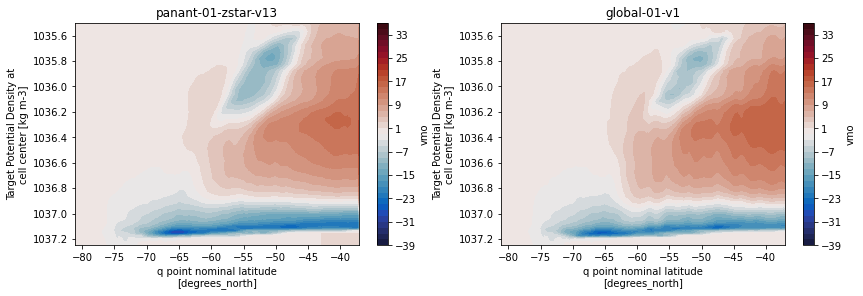

In [14]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_year1 = vmo.sel(time=slice('1997-01-01','1998-12-31')).sel(yq=slice(-85,-37)).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-39,39,2),cmap=cm.cm.balance)
    plt.ylim([1035.5,1037.25])
    plt.gca().invert_yaxis()
    plt.title(expt)

## Sea Ice Extent - SH only

Text(0.5, 1.0, 'Sea Ice Extent')

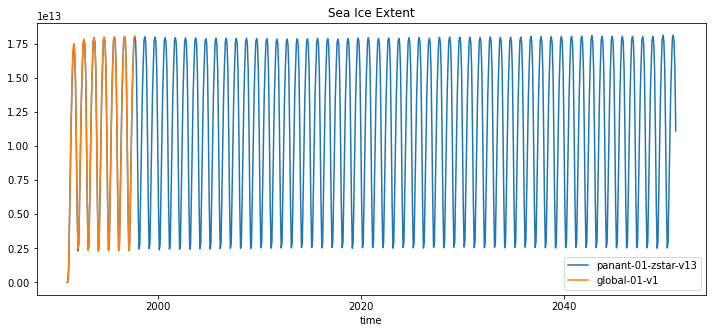

In [15]:
fig=plt.figure(figsize=(12,5))
areacello = cc.querying.getvar(expt,'areacello', session,n=1)
for expt in expts:
    SIC = cc.querying.getvar(expt,'siconc', session,frequency='1 monthly').rename({'yT':'yh', 'xT':'xh'})
    SIE = (SIC*areacello).sel(yh=slice(-85,0)).sum(['xh','yh']).load()
    SIE.plot(label=expt)
plt.legend()
plt.title('Sea Ice Extent')